# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN

13/10/2017

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [36]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.distance = DistanceMetric.get_metric("euclidean")

    def euc_distance(self,a, b):
        return self.distance.pairwise([a], [b])[0,0]
        
    def closest(self, row, k):
        dists = [(index,self.euc_distance(row, item)) for index,item in enumerate(self.X_train)]
        dists.sort(key = lambda x: x[1])
        nei = []
        for i in range(k):
            nei.append(self.y_train[dists[i][0]])
        cl = Counter(nei).most_common(1)[0][0]
        
        return cl

    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels

    def predict(self, to_classify, k):
        predictions = []
        for row in to_classify:
            labels = np.argmax(np.bincount(self.closest(row, k)))
            predictions.append(labels)
        return predictions

In [38]:
df = pd.read_csv('train.csv')
df['Age'] = df.Age.fillna(df.Age.mean())
df = df.where((pd.notnull(df)), 0)
for f in ["Sex", "Embarked"]:
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,3


In [39]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = df.get(features)
Y = df["Survived"].values

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
predict = knn.predict(X_test)

In [43]:
accuracy_score(Y_test, predict)

0.68609865470852016

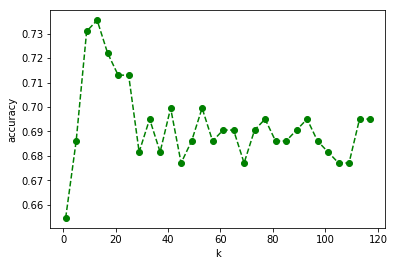

In [45]:
accuracies = []
for k_test in range(1, 120, 4):
    knn = KNeighborsClassifier(n_neighbors=k_test)
    knn.fit(X_train,Y_train)
    accuracies.append(accuracy_score(Y_test, knn.predict(X_test)))

plt.plot(range(1,120,4), accuracies, color='green', linestyle='dashed', marker='o' )
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [47]:
best_k = 13
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,Y_train)
best_accuracy = accuracy_score(Y_test, knn.predict(X_test))
report = classification_report(knn.predict(X_test), Y_test)
print(report)

             precision    recall  f1-score   support

          0       0.82      0.79      0.81       156
          1       0.56      0.60      0.58        67

avg / total       0.74      0.74      0.74       223

